# INTRODUCTION TO DATA

In [190]:
import pandas as pd
import numpy as np

sales_dataset = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [191]:
sales_dataset.shape

(16719, 16)

In [192]:
sales_dataset.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
# Get the number of distinct values in the 'Name' column
unique_names_count = sales_dataset['Name'].nunique()
print(unique_names_count)


11562


In [194]:
platform_summary = (sales_dataset
                    .groupby('Platform')
                    .size()
                    .reset_index(name='Count')
                    .assign(Perc=lambda x: round(x['Count'] / len(sales_dataset) * 100, 2))
                    .sort_values(by='Count', ascending=False))

print(platform_summary)

   Platform  Count   Perc
16      PS2   2161  12.93
4        DS   2152  12.87
17      PS3   1331   7.96
26      Wii   1320   7.90
28     X360   1262   7.55
19      PSP   1209   7.23
15       PS   1197   7.16
13       PC    974   5.83
29       XB    824   4.93
6       GBA    822   4.92
7        GC    556   3.33
2       3DS    520   3.11
20      PSV    432   2.58
18      PS4    393   2.35
10      N64    319   1.91
30     XOne    247   1.48
23     SNES    239   1.43
21      SAT    173   1.03
27     WiiU    147   0.88
0      2600    133   0.80
11      NES     98   0.59
5        GB     98   0.59
3        DC     52   0.31
8       GEN     29   0.17
12       NG     12   0.07
22      SCD      6   0.04
25       WS      6   0.04
1       3DO      3   0.02
24     TG16      2   0.01
14     PCFX      1   0.01
9        GG      1   0.01


In [195]:
# Group by 'Genre', calculate the count and percentage, then sort by 'Count' in descending order
genre_summary = (sales_dataset
                 .groupby('Genre')
                 .size()
                 .reset_index(name='Count')
                 .assign(Perc=lambda x: round(x['Count'] / len(sales_dataset) * 100, 2))
                 .sort_values(by='Count', ascending=False))

print(genre_summary)

           Genre  Count   Perc
0         Action   3370  20.16
10        Sports   2348  14.04
3           Misc   1750  10.47
7   Role-Playing   1500   8.97
8        Shooter   1323   7.91
1      Adventure   1303   7.79
6         Racing   1249   7.47
4       Platform    888   5.31
9     Simulation    874   5.23
2       Fighting    849   5.08
11      Strategy    683   4.09
5         Puzzle    580   3.47


In [196]:
# Group by 'Publisher', calculate the count and percentage, then sort by 'Count' in descending order
publisher_summary = (sales_dataset
                     .groupby('Publisher')
                     .size()
                     .reset_index(name='Count')
                     .assign(Perc=lambda x: round(x['Count'] / len(sales_dataset) * 100, 2))
                     .sort_values(by='Count', ascending=False))

print(publisher_summary)

                        Publisher  Count  Perc
139               Electronic Arts   1356  8.11
21                     Activision    985  5.89
349            Namco Bandai Games    939  5.62
529                       Ubisoft    933  5.58
277  Konami Digital Entertainment    834  4.99
..                            ...    ...   ...
356           New World Computing      1  0.01
452  Simon & Schuster Interactive      1  0.01
355                           New      1  0.01
455                       Societa      1  0.01
156   Extreme Entertainment Group      1  0.01

[582 rows x 3 columns]


In [197]:
# Group by 'Rating', calculate the count and percentage, then sort by 'Count' in descending order
rating_summary = (sales_dataset
                  .groupby('Rating')
                  .size()
                  .reset_index(name='Count')
                  .assign(Perc=lambda x: round(x['Count'] / len(sales_dataset) * 100, 2))
                  .sort_values(by='Count', ascending=False))

print(rating_summary)

  Rating  Count   Perc
1      E   3991  23.87
7      T   2961  17.71
5      M   1563   9.35
2   E10+   1420   8.49
3     EC      8   0.05
4    K-A      3   0.02
6     RP      3   0.02
0     AO      1   0.01


In [198]:
# Summary including categorical columns
print(sales_dataset.describe(include='all'))

                               Name Platform  Year_of_Release   Genre  \
count                         16717    16719     16450.000000   16717   
unique                        11562       31              NaN      12   
top     Need for Speed: Most Wanted      PS2              NaN  Action   
freq                             12     2161              NaN    3370   
mean                            NaN      NaN      2006.487356     NaN   
std                             NaN      NaN         5.878995     NaN   
min                             NaN      NaN      1980.000000     NaN   
25%                             NaN      NaN      2003.000000     NaN   
50%                             NaN      NaN      2007.000000     NaN   
75%                             NaN      NaN      2010.000000     NaN   
max                             NaN      NaN      2020.000000     NaN   

              Publisher      NA_Sales      EU_Sales      JP_Sales  \
count             16665  16719.000000  16719.000000  1

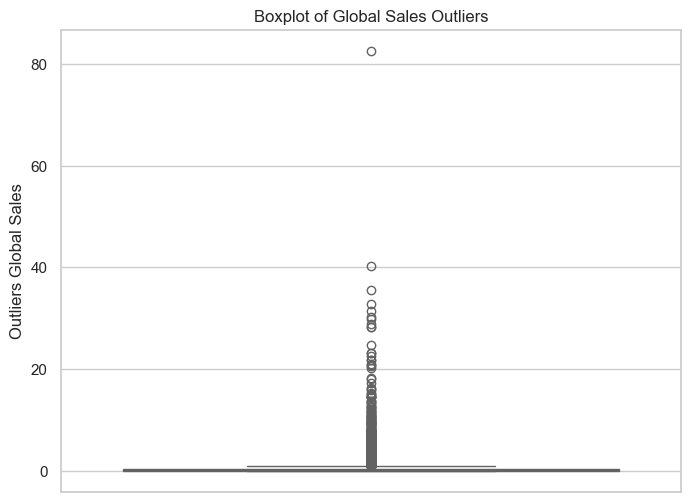

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Create a boxplot for 'Global_Sales'
plt.figure(figsize=(8, 6))
sns.boxplot(y=sales_dataset['Global_Sales'], color="tomato")
plt.ylabel("Outliers Global Sales")
plt.title("Boxplot of Global Sales Outliers")
plt.xticks(rotation=90)
plt.show()

# DATA PREPROCESSING

In [200]:
sales_dataset.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
import pandas as pd

# Drop the columns 'NA_Sales', 'EU_Sales', 'JP_Sales', and 'Other_Sales'
sales_dataset = sales_dataset.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

# Filter out rows where 'Platform' is 'PCFX' or 'GG'
sales_dataset = sales_dataset[(sales_dataset['Platform'] != 'PCFX') & (sales_dataset['Platform'] != 'GG')]

# Calculate the age of the release year and update the 'Year_of_Release' column
sales_dataset['Year_of_Release'] = 2024 - sales_dataset['Year_of_Release']

# Rename the third column to 'Age'
sales_dataset = sales_dataset.rename(columns={'Year_of_Release': 'Age'})


In [202]:
sales_dataset.head()

,Name,Platform,Age,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,18.0,Sports,Nintendo,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,39.0,Platform,Nintendo,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,16.0,Racing,Nintendo,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,15.0,Sports,Nintendo,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,28.0,Role-Playing,Nintendo,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
import pandas as pd
import numpy as np

# Filter rows where 'Name' or 'Genre' is not empty
sales_dataset = sales_dataset[(sales_dataset['Name'] != "") | (sales_dataset['Genre'] != "")]

# Replace empty strings with NaN
sales_dataset = sales_dataset.replace('', np.nan)

# Convert 'User_Score' column to string type
sales_dataset['User_Score'] = sales_dataset['User_Score'].astype(str)

# Replace "tbd" values in 'User_Score' with an empty string
sales_dataset['User_Score'] = sales_dataset['User_Score'].replace("tbd", "")


In [204]:
sales_dataset.head()

,Name,Platform,Age,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,18.0,Sports,Nintendo,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,39.0,Platform,Nintendo,40.24,NaN,NaN,nan,NaN,NaN,NaN
2,Mario Kart Wii,Wii,16.0,Racing,Nintendo,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,15.0,Sports,Nintendo,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,28.0,Role-Playing,Nintendo,31.37,NaN,NaN,nan,NaN,NaN,NaN


<Axes: >

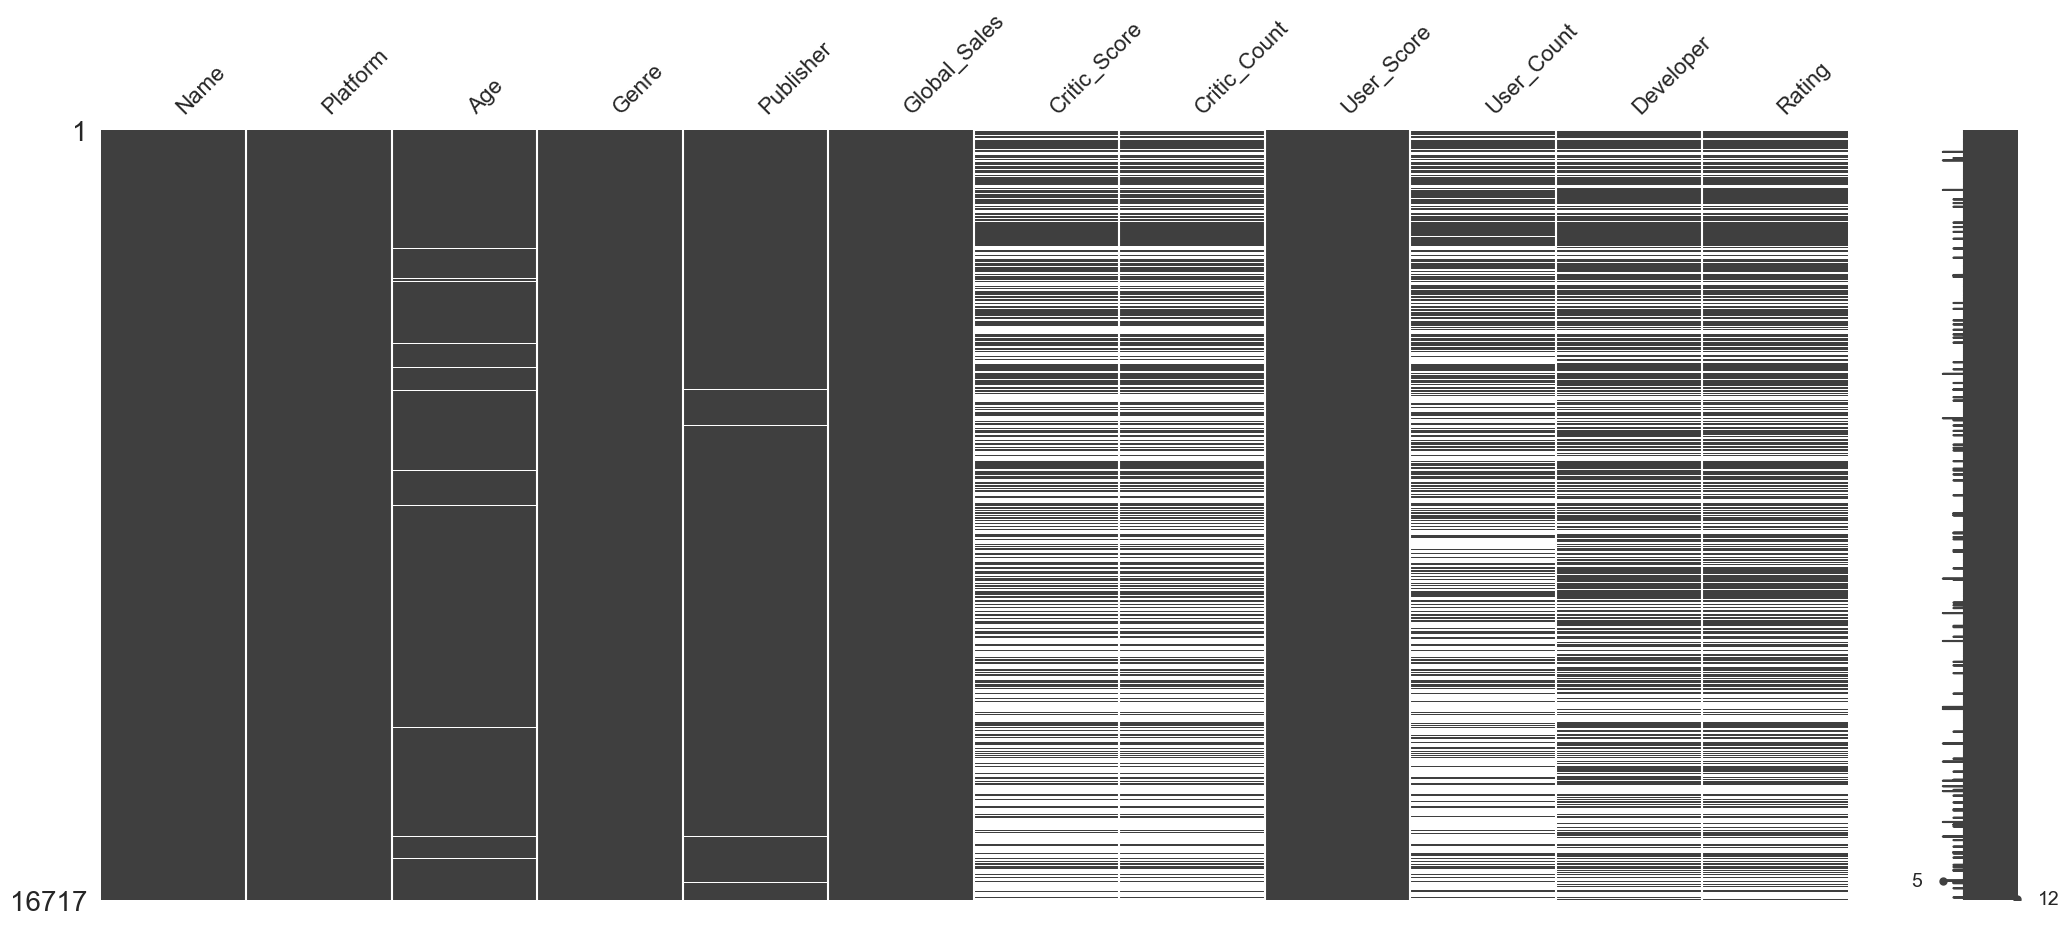

In [205]:
import missingno as msno

# Plot missing data
msno.matrix(sales_dataset)

<Axes: >

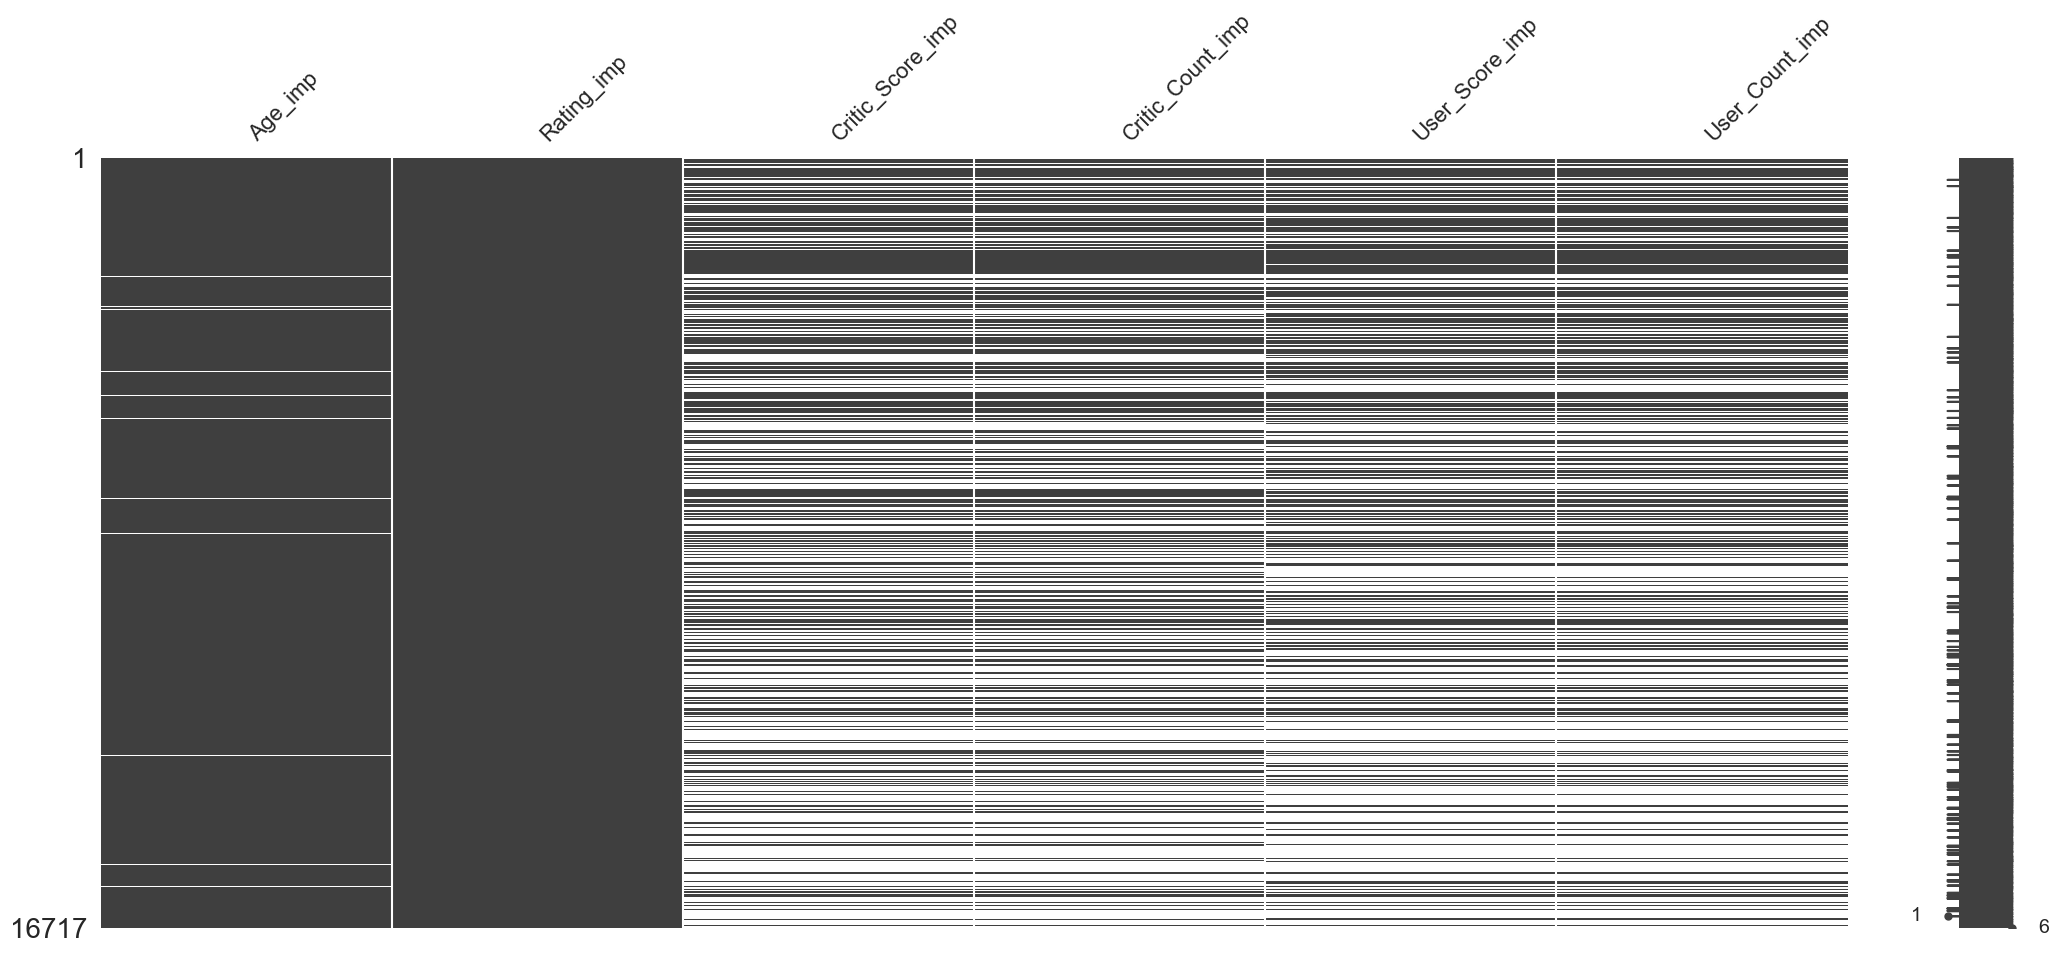

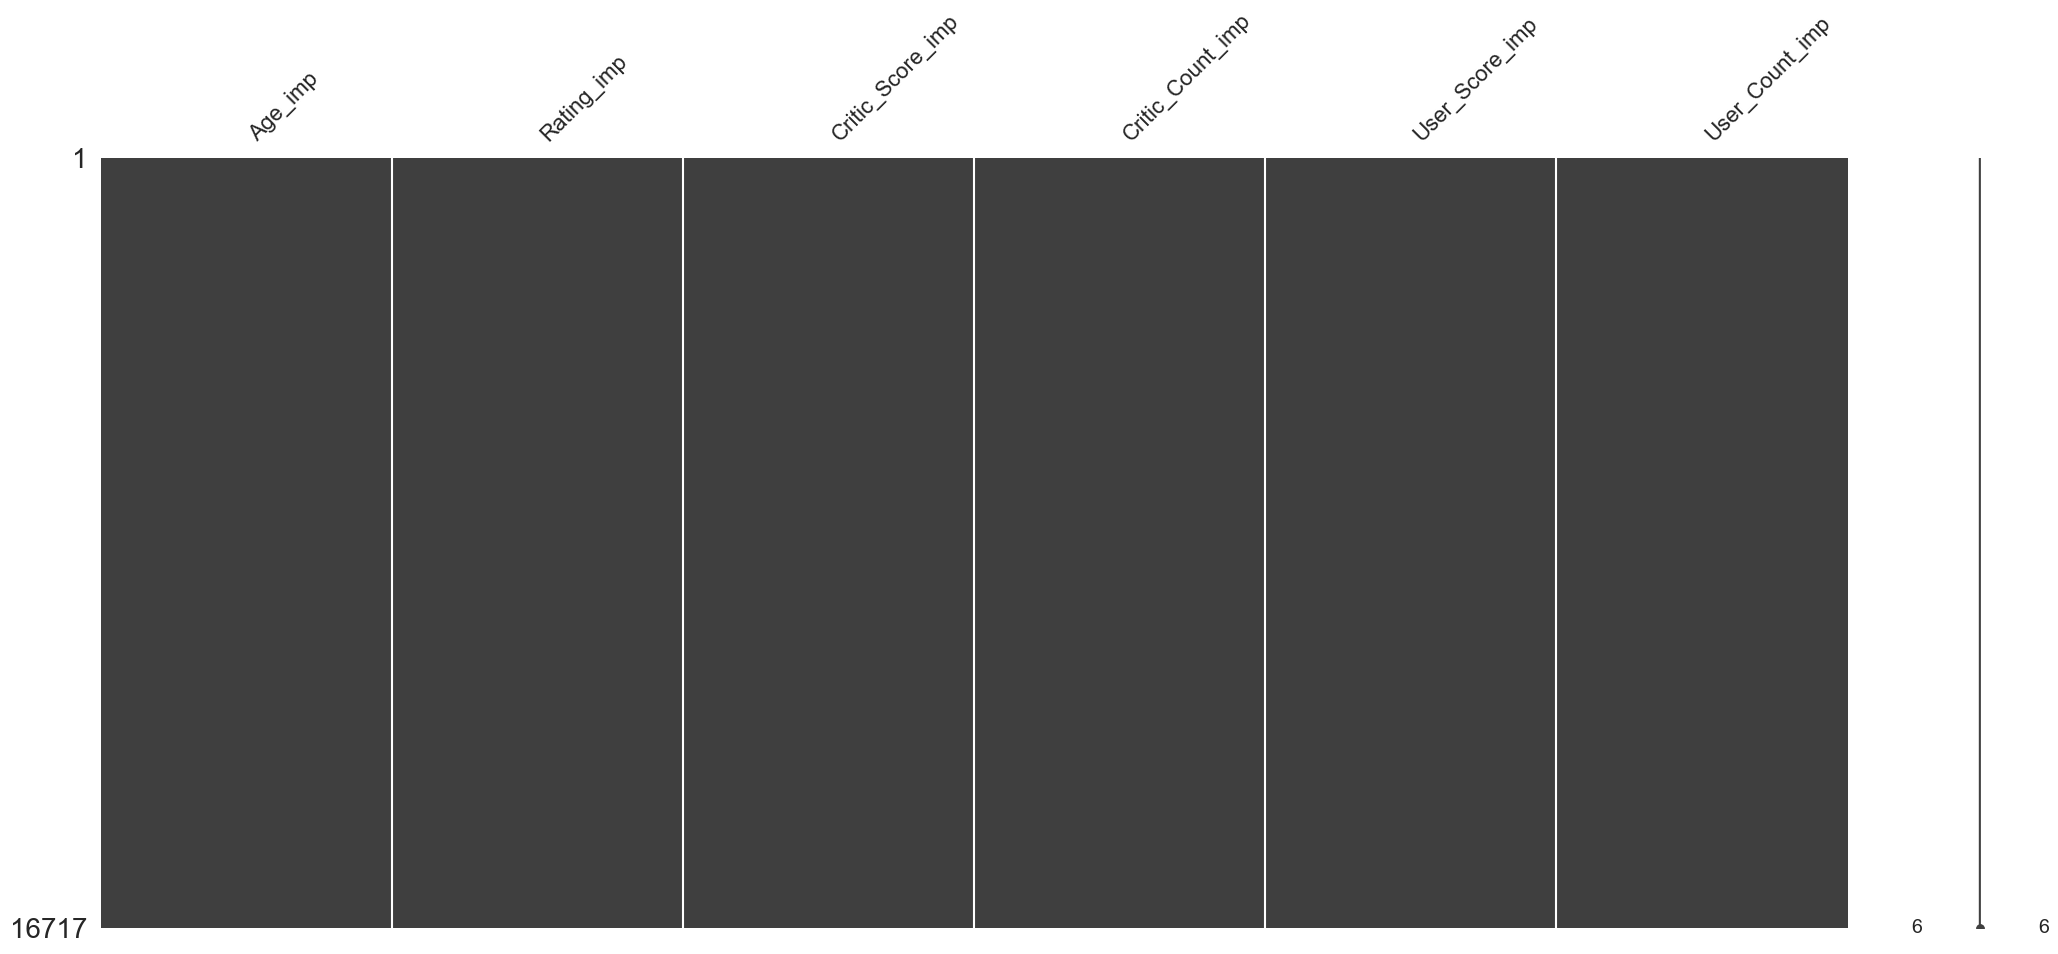

In [206]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import missingno as msno

# Convert 'User_Score' column to a numeric type (float) and handle errors by setting invalid parsing to NaN
sales_dataset['User_Score'] = pd.to_numeric(sales_dataset['User_Score'], errors='coerce')

# Create a new DataFrame for imputation with selected columns
df_imputation = sales_dataset[['Age', 'Rating', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']].copy()
df_imputation.columns = ["Age_imp", "Rating_imp", "Critic_Score_imp", "Critic_Count_imp", "User_Score_imp", "User_Count_imp"]

# Convert 'Rating_imp' to numeric labels
rating_encoder = LabelEncoder()
df_imputation['Rating_imp'] = rating_encoder.fit_transform(df_imputation['Rating_imp'].astype(str))

# Display missing data pattern
msno.matrix(df_imputation)

# Perform multiple imputation using IterativeImputer (similar to MICE)
imputer = IterativeImputer(random_state=123)
df_imputation_imputed = pd.DataFrame(imputer.fit_transform(df_imputation), columns=df_imputation.columns)

# Plot missing data in the imputed DataFrame
msno.matrix(df_imputation_imputed)


In [207]:
import pandas as pd

# Revert numeric labels back to categorical values for 'Rating_imp'
rating_mapping = {1: 'AO', 2: 'E', 3: 'E10+', 4: 'EC', 5: 'K-A', 6: 'M', 7: 'RP', 8: 'T'}
df_imputation['Rating_imp'] = df_imputation['Rating_imp'].map(rating_mapping)

# Add an 'ID' column to both DataFrames
sales_dataset = sales_dataset.reset_index(drop=True).reset_index().rename(columns={'index': 'ID'})
df_imputation = df_imputation.reset_index(drop=True).reset_index().rename(columns={'index': 'ID'})

# Merge the two DataFrames on the 'ID' column
sales_dataset = pd.merge(sales_dataset, df_imputation, on="ID")

# Drop unnecessary columns from the merged DataFrame
sales_dataset = sales_dataset.drop(columns=['ID', 'Rating', 'Age', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'])


# EDA

C:\Users\HP\AppData\Local\Temp\ipykernel_18764\475170266.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=publisher_data, y='Publisher', x='count', palette=['orange'])
C:\Users\HP\AppData\Local\Temp\ipykernel_18764\475170266.py:11: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=publisher_data, y='Publisher', x='count', palette=['orange'])


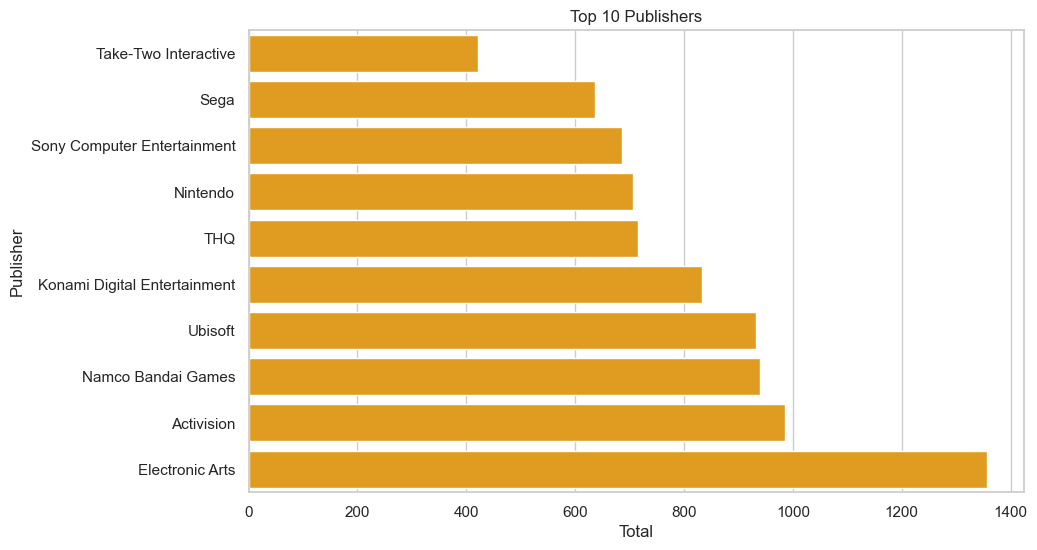

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Publisher' and count the occurrences, then select the top 10 publishers
publisher_data = sales_dataset.groupby('Publisher').size().reset_index(name='count')
publisher_data = publisher_data.nlargest(10, 'count')

# Plot using seaborn and matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(data=publisher_data, y='Publisher', x='count', palette=['orange'])
plt.title("Top 10 Publishers")
plt.xlabel("Total")
plt.ylabel("Publisher")
plt.gca().invert_yaxis()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_18764\738582307.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_data, x='Genre', y='count', palette=['red'])
C:\Users\HP\AppData\Local\Temp\ipykernel_18764\738582307.py:11: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=genre_data, x='Genre', y='count', palette=['red'])


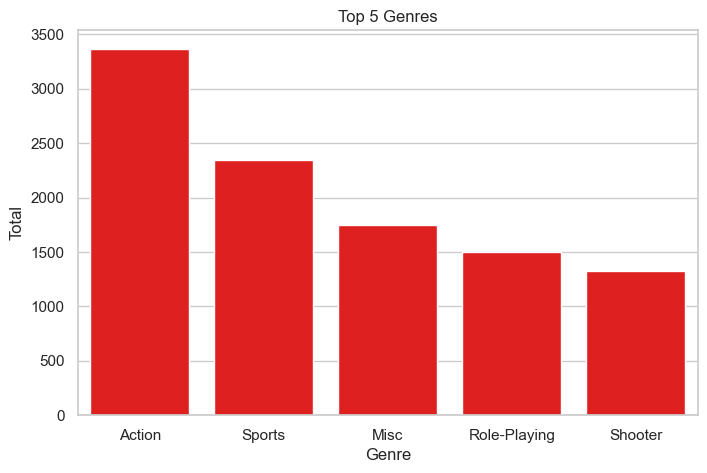

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Genre' and count occurrences, then select the top 5 genres
genre_data = sales_dataset.groupby('Genre').size().reset_index(name='count')
genre_data = genre_data.nlargest(5, 'count')

# Plot using seaborn and matplotlib
plt.figure(figsize=(8, 5))
sns.barplot(data=genre_data, x='Genre', y='count', palette=['red'])
plt.title("Top 5 Genres")
plt.xlabel("Genre")
plt.ylabel("Total")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_18764\1803788527.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=platform_data, x='Platform', y='count', palette=['yellow'])
C:\Users\HP\AppData\Local\Temp\ipykernel_18764\1803788527.py:11: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=platform_data, x='Platform', y='count', palette=['yellow'])


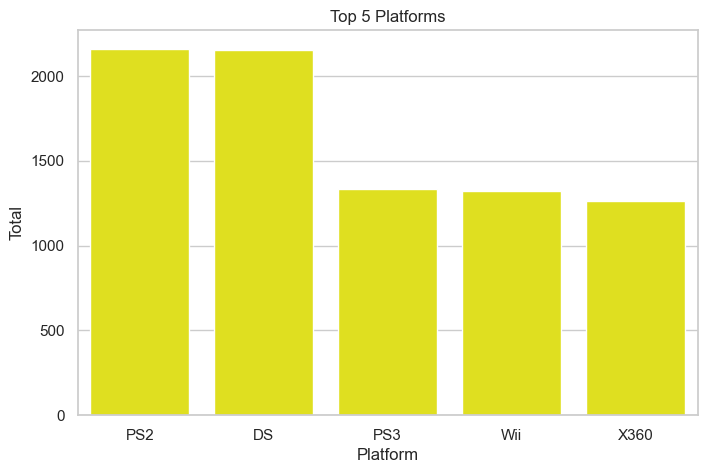

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Platform' and count occurrences, then select the top 5 platforms
platform_data = sales_dataset.groupby('Platform').size().reset_index(name='count')
platform_data = platform_data.nlargest(5, 'count')

# Plot using seaborn and matplotlib
plt.figure(figsize=(8, 5))
sns.barplot(data=platform_data, x='Platform', y='count', palette=['yellow'])
plt.title("Top 5 Platforms")
plt.xlabel("Platform")
plt.ylabel("Total")
plt.show()


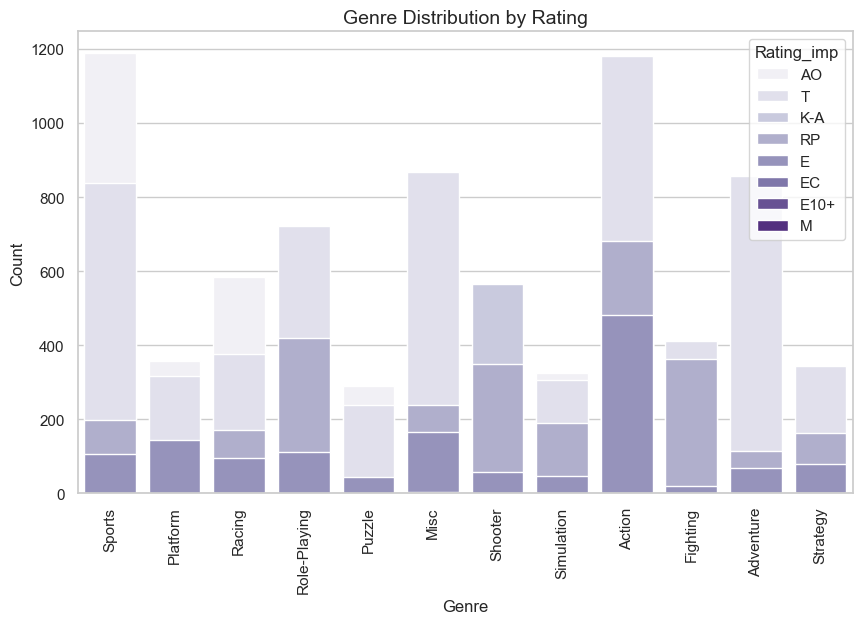

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for Genre, faceted by Rating_imp
plt.figure(figsize=(10, 6))
sns.countplot(data=sales_dataset, x='Genre', hue='Rating_imp', palette='Purples', dodge=False)

# Flip the coordinates (rotate the plot)
plt.xticks(rotation=90)

# Set title and labels
plt.title("Genre Distribution by Rating", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show the plot
plt.show()


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\HP\AppData\Local\Temp\ipykernel_18764\3737314345.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


<Figure size 1200x600 with 0 Axes>

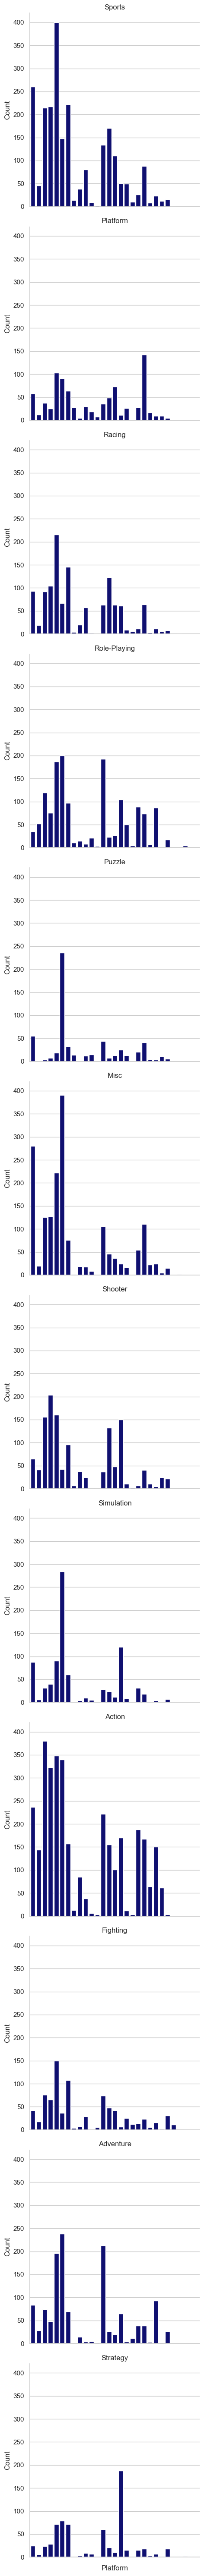

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the count plot for 'Platform' and facet by 'Genre'
plt.figure(figsize=(12, 6))
g = sns.FacetGrid(sales_dataset, col="Genre", col_wrap=1, height=5)  # facet_wrap by 'Genre'
g.map(sns.countplot, 'Platform', color='navy')  # Plot with navy color

# Set axis labels and title
g.set_axis_labels("Platform", "Count")
g.set_titles("{col_name}")

# Rotate the x-axis labels to mimic coord_flip()
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Apply minimal theme
sns.set_theme(style="whitegrid")

# Show the plot
plt.show()


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\HP\AppData\Local\Temp\ipykernel_18764\1866821966.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


<Figure size 1200x600 with 0 Axes>

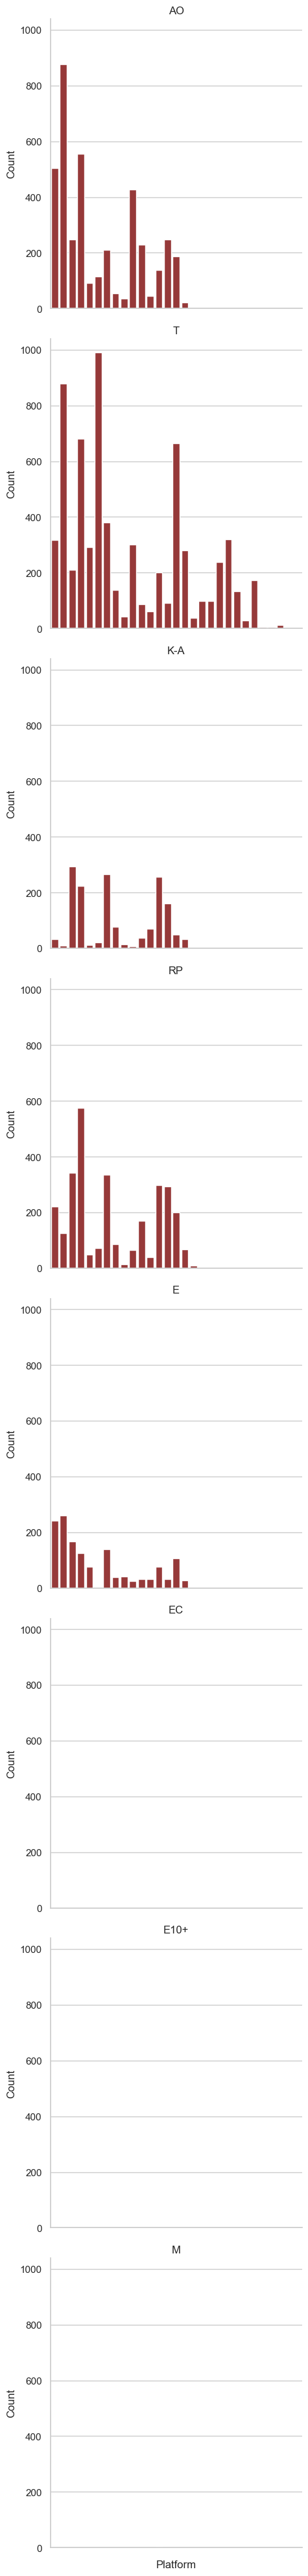

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the count plot for 'Platform' and facet by 'Rating_imp'
plt.figure(figsize=(12, 6))
g = sns.FacetGrid(sales_dataset, col="Rating_imp", col_wrap=1, height=5)  # facet_wrap by 'Rating_imp'
g.map(sns.countplot, 'Platform', color='brown')  # Plot with brown color

# Set axis labels and titles
g.set_axis_labels("Platform", "Count")
g.set_titles("{col_name}")

# Rotate the x-axis labels to mimic coord_flip()
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Apply minimal theme
sns.set_theme(style="whitegrid")

# Show the plot
plt.show()


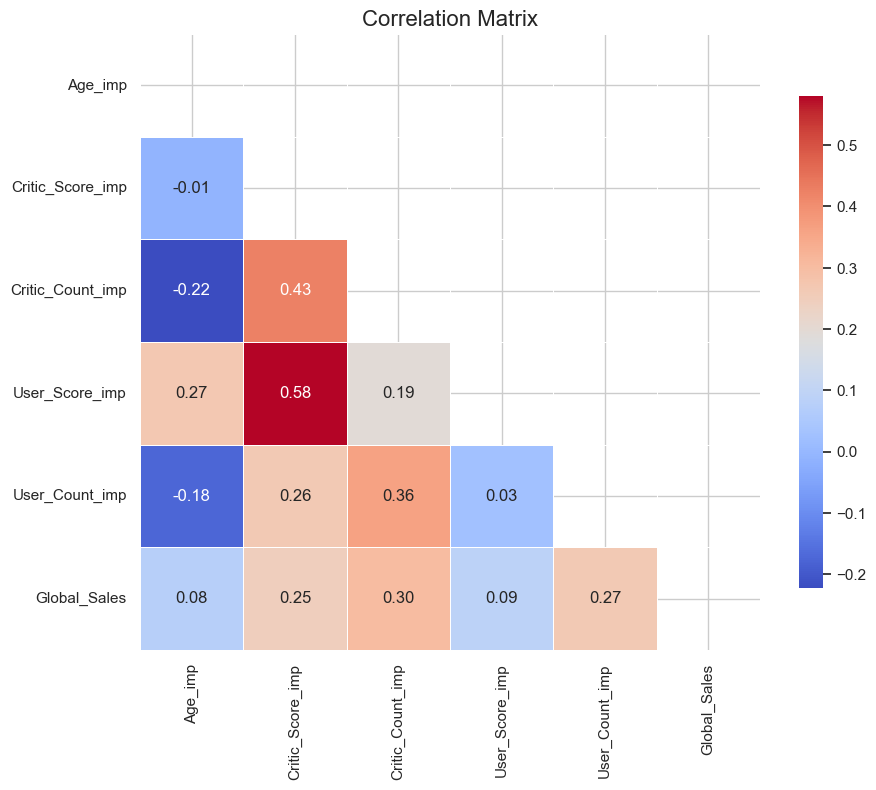

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select the relevant columns for correlation
cor_df = sales_dataset[['Age_imp', 'Critic_Score_imp', 'Critic_Count_imp', 'User_Score_imp', 'User_Count_imp', 'Global_Sales']]

# Calculate the correlation matrix
cor_matrix = cor_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(cor_matrix), linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title("Correlation Matrix", fontsize=16)
plt.show()


# DATA PREPARATION

 In this section, the dataset will be divided into four datasets. The four datasets explained as follows:
 
 
 | Dataset Number | Training | Test | Data Scaling | Outliers Removed |
|----------------|----------|------|--------------|-------------------|
| Dataset_1      | 70       | 30   | No           | No               |
| Dataset_2      | 70       | 30   | Yes          | No               |
| Dataset_3      | 70       | 30   | Yes          | Yes              |
| Dataset_4      | 80       | 20   | Yes          | Yes              |

 

In [215]:
# Drop the specified columns from the dataset
sales_dataset1 = sales_dataset.drop(columns=['Name', 'Publisher', 'Developer'])

In [216]:
sales_dataset1.head()

,Platform,Genre,Global_Sales,Age_imp,Rating_imp,Critic_Score_imp,Critic_Count_imp,User_Score_imp,User_Count_imp
0,Wii,Sports,82.53,18.0,AO,76.0,51.0,8.0,322.0
1,NES,Platform,40.24,39.0,T,NaN,NaN,NaN,NaN
2,Wii,Racing,35.52,16.0,AO,82.0,73.0,8.3,709.0
3,Wii,Sports,32.77,15.0,AO,80.0,73.0,8.0,192.0
4,GB,Role-Playing,31.37,28.0,T,NaN,NaN,NaN,NaN


In [217]:
sales_dataset1 = sales_dataset1.drop(columns=['Platform', 'Genre', 'Rating_imp'])
sales_dataset1.head()
print(sales_dataset1.shape)

(16717, 6)


In [218]:
sales_dataset1 = sales_dataset1.dropna()
sales_dataset1.shape

(6894, 6)

In [219]:
sales_dataset1.head()

,Global_Sales,Age_imp,Critic_Score_imp,Critic_Count_imp,User_Score_imp,User_Count_imp
0,82.53,18.0,76.0,51.0,8.0,322.0
2,35.52,16.0,82.0,73.0,8.3,709.0
3,32.77,15.0,80.0,73.0,8.0,192.0
6,29.80,18.0,89.0,65.0,8.5,431.0
7,28.92,18.0,58.0,41.0,6.6,129.0


In [220]:
sales_dataset1.isnull().sum()

Global_Sales        0
Age_imp             0
Critic_Score_imp    0
Critic_Count_imp    0
User_Score_imp      0
User_Count_imp      0
dtype: int64

In [221]:
# Exp 1 - train:test 70:30, seed 555

from sklearn.model_selection import train_test_split

# Set a random seed for reproducibility
import numpy as np
np.random.seed(555)

# Split the dataset into train and test sets (70% train, 30% test)
train_dataset1, test_dataset1 = train_test_split(sales_dataset1, test_size=0.3, random_state=555)

# Check the shapes of the resulting datasets
print(f"Training dataset shape: {train_dataset1.shape}")
print(f"Testing dataset shape: {test_dataset1.shape}")


Training dataset shape: (4825, 6)
Testing dataset shape: (2069, 6)


In [222]:
# Exp 2 - train:test 70:30, seed 555, data scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
import numpy as np
np.random.seed(555)

# Split the dataset into train and test sets (70% train, 30% test)
train_dataset2, test_dataset2 = train_test_split(sales_dataset1, test_size=0.3, random_state=555)

# Initialize the StandardScaler for scaling
scaler = StandardScaler()

# Scale the 3rd column (index 2) in both train and test datasets
train_dataset2.iloc[:, 2] = scaler.fit_transform(train_dataset2.iloc[:, [2]])
test_dataset2.iloc[:, 2] = scaler.transform(test_dataset2.iloc[:, [2]])

# Scale columns 6 to 9 (indexes 5 to 8) in both train and test datasets
train_dataset2.iloc[:, 5:9] = scaler.fit_transform(train_dataset2.iloc[:, 5:9])
test_dataset2.iloc[:, 5:9] = scaler.transform(test_dataset2.iloc[:, 5:9])

# Check the shapes of the resulting datasets
print(f"Training dataset shape: {train_dataset2.shape}")
print(f"Testing dataset shape: {test_dataset2.shape}")


Training dataset shape: (4825, 6)
Testing dataset shape: (2069, 6)


In [223]:
# Exp 3 - train:test 70:30, seed 555, outliers removed, data scaling

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Remove outliers based on the Interquartile Range (IQR) method
Q1 = sales_dataset1['Global_Sales'].quantile(0.25)
Q3 = sales_dataset1['Global_Sales'].quantile(0.75)
iqr = Q3 - Q1

# Filter the dataset to remove outliers
sales_dataset1_clean = sales_dataset1[(sales_dataset1['Global_Sales'] > (Q1 - 1.5 * iqr)) &
                                       (sales_dataset1['Global_Sales'] < (Q3 + 1.5 * iqr))]

# Set random seed for reproducibility
np.random.seed(555)

# Split the cleaned dataset into train and test sets (70% train, 30% test)
train_dataset3, test_dataset3 = train_test_split(sales_dataset1_clean, test_size=0.3, random_state=555)

# Initialize the StandardScaler for scaling
scaler = StandardScaler()

# Scale the 3rd column (index 2) in both train and test datasets
train_dataset3.iloc[:, 2] = scaler.fit_transform(train_dataset3.iloc[:, [2]])
test_dataset3.iloc[:, 2] = scaler.transform(test_dataset3.iloc[:, [2]])

# Scale columns 6 to 9 (indexes 5 to 8) in both train and test datasets
train_dataset3.iloc[:, 5:9] = scaler.fit_transform(train_dataset3.iloc[:, 5:9])
test_dataset3.iloc[:, 5:9] = scaler.transform(test_dataset3.iloc[:, 5:9])

# Check the shapes of the resulting datasets
print(f"Training dataset shape: {train_dataset3.shape}")
print(f"Testing dataset shape: {test_dataset3.shape}")


Training dataset shape: (4346, 6)
Testing dataset shape: (1863, 6)


In [224]:
# Exp 4 - train:test 80:20, seed 555, outlier removed, data scaling

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(555)

# Split the cleaned dataset into train and test sets (80% train, 20% test)
train_dataset4, test_dataset4 = train_test_split(sales_dataset1_clean, test_size=0.2, random_state=555)

# Initialize the StandardScaler for scaling
scaler = StandardScaler()

# Scale the 3rd column (index 2) in both train and test datasets
train_dataset4.iloc[:, 2] = scaler.fit_transform(train_dataset4.iloc[:, [2]])
test_dataset4.iloc[:, 2] = scaler.transform(test_dataset4.iloc[:, [2]])

# Scale columns 6 to 9 (indexes 5 to 8) in both train and test datasets
train_dataset4.iloc[:, 5:9] = scaler.fit_transform(train_dataset4.iloc[:, 5:9])
test_dataset4.iloc[:, 5:9] = scaler.transform(test_dataset4.iloc[:, 5:9])

# Check the shapes of the resulting datasets
print(f"Training dataset shape: {train_dataset4.shape}")
print(f"Testing dataset shape: {test_dataset4.shape}")


Training dataset shape: (4967, 6)
Testing dataset shape: (1242, 6)


# MODEL DEVELOPEMENT

# MLR

In [225]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the features (X) and the target variable (y)
X_train1 = train_dataset1.drop(columns=['Global_Sales'])  # Adjust as necessary
y_train1 = train_dataset1['Global_Sales']

# Initialize and train the linear regression model
regressor1 = LinearRegression()
regressor1.fit(X_train1, y_train1)

# Get predictions for both train and test sets
y_train_pred1 = regressor1.predict(X_train1)
y_test_pred1 = regressor1.predict(test_dataset1.drop(columns=['Global_Sales']))  # Adjust columns for test data

# Evaluate the model performance using MSE and R²
mse_train = mean_squared_error(y_train1, y_train_pred1)
r2_train = r2_score(y_train1, y_train_pred1)
mse_test = mean_squared_error(test_dataset1['Global_Sales'], y_test_pred1)
r2_test = r2_score(test_dataset1['Global_Sales'], y_test_pred1)

# Print the coefficients, intercept, and model performance
print(f"Coefficients: {regressor1.coef_}")
print(f"Intercept: {regressor1.intercept_}")
# print(f"Train MSE: {mse_train}, Train R²: {r2_train}")
# print(f"Test MSE: {mse_test}, Test R²: {r2_test}")


Coefficients: [ 0.04049114  0.0215021   0.01983988 -0.0933553   0.00048297]
Intercept: -1.4000835005284369


In [226]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Function to perform backward elimination
def backward_elimination(X, y, significance_level = 0.05):
    initial_features = X.columns.tolist()
    while len(initial_features) > 0:
        X_ = X[initial_features]
        model = sm.OLS(y, sm.add_constant(X_)).fit()
        max_p_value = model.pvalues.max()  # Get highest p-value
        if max_p_value > significance_level:
            excluded_feature = model.pvalues.idxmax()  # Feature with highest p-value
            initial_features.remove(excluded_feature)
        else:
            break
    return X[initial_features]

# Define your independent variables (X) and dependent variable (y)
X_train1 = train_dataset1.drop(columns=['Global_Sales'])
y_train1 = train_dataset1['Global_Sales']
X_test1 = test_dataset1.drop(columns=['Global_Sales'])
y_test1 = test_dataset1['Global_Sales']

# Perform backward elimination on training data
X_train_selected = backward_elimination(X_train1, y_train1)

# Build the model with the selected features
model = sm.OLS(y_train1, sm.add_constant(X_train_selected)).fit()

# Print summary of the model
print(model.summary())

# Predictions on training and test sets
y_train_pred = model.predict(sm.add_constant(X_train_selected))
y_test_pred = model.predict(sm.add_constant(X_test1[X_train_selected.columns]))

# Evaluation metrics
rmse_train = np.sqrt(mean_squared_error(y_train1, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test1, y_test_pred))

mae_train = mean_absolute_error(y_train1, y_train_pred)
mae_test = mean_absolute_error(y_test1, y_test_pred)

print(f"RMSE on training set: {rmse_train}")
print(f"RMSE on test set: {rmse_test}")
print(f"MAE on training set: {mae_train}")
print(f"MAE on test set: {mae_test}")


                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     119.5
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          1.58e-119
Time:                        13:21:13   Log-Likelihood:                -9978.0
No. Observations:                4825   AIC:                         1.997e+04
Df Residuals:                    4819   BIC:                         2.001e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.4001      0.181  

In [227]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have already loaded your train_dataset2 and test_dataset2 as pandas DataFrames
# For simplicity, I'll assume 'train_dataset2' and 'test_dataset2' are ready

# Define the features (X) and target (y) for training and testing
X_train2 = train_dataset2.drop(columns=['Global_Sales'])
y_train2 = train_dataset2['Global_Sales']

X_test2 = test_dataset2.drop(columns=['Global_Sales'])
y_test2 = test_dataset2['Global_Sales']

# Initialize and fit the model
regressor2 = LinearRegression()
regressor2.fit(X_train2, y_train2)

# Model summary (no direct equivalent in sklearn, but we can check coefficients and intercept)
print(f"Intercept: {regressor2.intercept_}")
print(f"Coefficients: {regressor2.coef_}")

# Making predictions on the training set
y2 = regressor2.predict(X_train2)

# You can create a confusion table-like output (although for regression it may not make much sense)
# But you can calculate RMSE or MAE, or just look at the predicted values
print(f"Predictions on train dataset:\n{y2[:10]}")  # Show first 10 predictions

# Making predictions on the test set
y_pred2 = regressor2.predict(X_test2)

# Output the first few predicted values from the test set
print(f"Predictions on test dataset:\n{y_pred2[:10]}")  # Show first 10 predictions

# You can compute RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error) to evaluate the model
def RMSE(y_pred, y_true):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def MAE(y_pred, y_true):
    return np.mean(np.abs(y_true - y_pred))


Intercept: 0.19236875318205082
Coefficients: [ 0.04049114  0.29876048  0.01983988 -0.0933553   0.28900588]
Predictions on train dataset:
[ 1.32423739  1.19108676 -0.34568604  0.98321934  0.79348867  0.28723745
  0.72876572  0.97426957  0.90717556  1.12248563]
Predictions on test dataset:
[0.20209694 0.50877541 0.34927721 0.87765873 0.41046073 0.86187766
 0.78867216 1.52133292 0.194582   0.90959201]


In [228]:
# RMSE on training set
rmse_train = RMSE(y2, y_train2)
print(f"RMSE on training set: {rmse_train}")

# RMSE on test set
rmse_test = RMSE(y_pred2, y_test2)
print(f"RMSE on test set: {rmse_test}")

# MAE on training set
mae_train = MAE(y2, y_train2)
print(f"MAE on training set: {mae_train}")

# MAE on test set
mae_test = MAE(y_pred2, y_test2)
print(f"MAE on test set: {mae_test}")


RMSE on training set: 1.9137044427877232
RMSE on test set: 1.5873222457423384
MAE on training set: 0.7057332976391316
MAE on test set: 0.6963438208688343


In [229]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'train_dataset3' and 'test_dataset3' are pandas DataFrames

# Prepare the data
X_train = train_dataset3.drop(columns=['Global_Sales'])  # Features
y_train = train_dataset3['Global_Sales']  # Target

X_test = test_dataset3.drop(columns=['Global_Sales'])  # Features
y_test = test_dataset3['Global_Sales']  # Target

# Add a constant to the model (equivalent to intercept in R)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the model (equivalent to lm in R)
regressor3 = sm.OLS(y_train, X_train).fit()

# Summary of the model
print(regressor3.summary())

# Predict on training data
y3 = regressor3.predict(X_train)

# Evaluate on training data (table in R is similar to comparing values, but we'll calculate RMSE and MAE)
rmse_train = np.sqrt(mean_squared_error(y_train, y3))
mae_train = mean_absolute_error(y_train, y3)



# Predict on test data
y_pred3 = regressor3.predict(X_test)

# Evaluate on test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred3))
mae_test = mean_absolute_error(y_test, y_pred3)



                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     160.1
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          1.29e-156
Time:                        13:21:13   Log-Likelihood:                -1664.1
No. Observations:                4346   AIC:                             3340.
Df Residuals:                    4340   BIC:                             3379.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2726      0.038  

In [230]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# RMSE on training set
rmse_train = np.sqrt(mean_squared_error(y_train, y3))
print(f"RMSE (Training): {rmse_train}")

# RMSE on test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred3))
print(f"RMSE (Test): {rmse_test}")

# MAE on train dataset
mae_train = mean_absolute_error(y_train, y3)
print(f"MAE (Training): {mae_train}")

# MAE on test dataset
mae_test = mean_absolute_error(y_test, y_pred3)
print(f"MAE (Test): {mae_test}")


RMSE (Training): 0.35486280850531776
RMSE (Test): 0.36878545182068
MAE (Training): 0.2690327232232036
MAE (Test): 0.28189439894646856


In [231]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming you already have train_dataset4 and test_dataset4 as DataFrames

# Preparing the features and target variable
X_train = train_dataset4.drop(columns='Global_Sales')
y_train = train_dataset4['Global_Sales']

X_test = test_dataset4.drop(columns='Global_Sales')
y_test = test_dataset4['Global_Sales']

# Adding constant to the model (for intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fitting the model
regressor4 = sm.OLS(y_train, X_train).fit()

# Summary of the model
print(regressor4.summary())

# Making predictions
y4 = regressor4.predict(X_train)
y_pred4 = regressor4.predict(X_test)

# Displaying a basic comparison between predictions and actuals
train_comparison = pd.DataFrame({'Actual': y_train, 'Predicted': y4})
print("Training Set Predictions")
print(train_comparison)

test_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred4})
print("Test Set Predictions")
print(test_comparison)



                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     185.5
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          1.36e-181
Time:                        13:21:13   Log-Likelihood:                -1907.8
No. Observations:                4967   AIC:                             3828.
Df Residuals:                    4961   BIC:                             3867.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2319      0.035  

In [232]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# RMSE on training set
rmse_train = np.sqrt(mean_squared_error(y_train, y4))
print(f"RMSE (Training): {rmse_train}")

# RMSE on test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred4))
print(f"RMSE (Test): {rmse_test}")

# MAE on train dataset
mae_train = mean_absolute_error(y_train, y4)
print(f"MAE (Training): {mae_train}")

# MAE on test dataset
mae_test = mean_absolute_error(y_test, y_pred4)
print(f"MAE (Test): {mae_test}")


RMSE (Training): 0.35528218073388007
RMSE (Test): 0.37364119025852555
MAE (Training): 0.26920928550844536
MAE (Test): 0.28537658845232655


                                                 SUMMARY OF MULTIPLE LINEAR REGRESSION 
                                      
| No.  | Experiment      |  RMSE (Training)  |  RMSE (Test)  |  MAE  (Training)  |  MAE (Test)  |
|-----|-----------------|-----------------|-------------|----------------|------------|
| 1   | Experiment 1   | 1.913704            | 1.587322         | 0.705733            | 0.696343        |
| 2   | Experiment 2   | 1.913704           | 1.587322         | 0.705733            | 0.696343        |
| 3   | Experiment 3   | 0.354862            | 0.368785         | 0.269032            | 0.281894        |
| 4   | Experiment 4   | 0.355282            | 0.373641         | 0.269209            | 0.285376        |




# RANDOMFOREST REGRESSION

RMSE on training set: 0.6998021821851109
MAE on training set: 0.2290631966444609
RMSE on test set: 1.5178910051100212
MAE on test set: 0.6130625261801191
Feature importances:
[0.13209461 0.19462287 0.19374955 0.13687944 0.34265352]


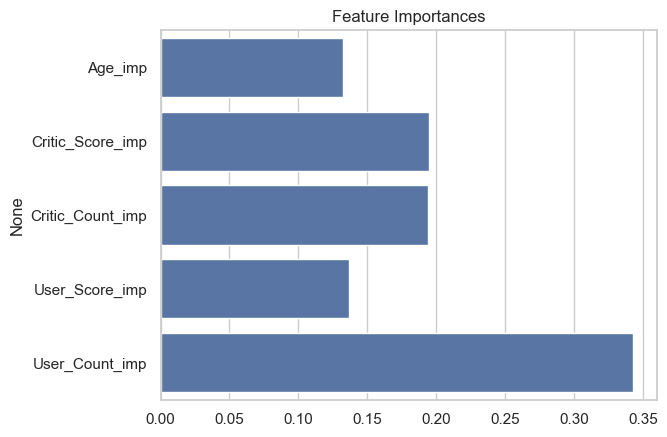

In [233]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Set a random seed for reproducibility
np.random.seed(555)

# Train a random forest model
rf1 = RandomForestRegressor(n_estimators=500, max_features=2, random_state=555)
rf1.fit(train_dataset1.drop(columns='Global_Sales'), train_dataset1['Global_Sales'])

# Predict on the training set
p11 = rf1.predict(train_dataset1.drop(columns='Global_Sales'))

# Confusion matrix (not directly applicable to regression, so we will just check the predicted values)
# Since RandomForestRegressor is used, we will compute metrics instead of the confusion matrix

# RMSE on training set
rmse_train = np.sqrt(mean_squared_error(train_dataset1['Global_Sales'], p11))
print(f"RMSE on training set: {rmse_train}")

# MAE on training set
mae_train = mean_absolute_error(train_dataset1['Global_Sales'], p11)
print(f"MAE on training set: {mae_train}")

# Predict on the test set
p21 = rf1.predict(test_dataset1.drop(columns='Global_Sales'))

# RMSE on test set
rmse_test = np.sqrt(mean_squared_error(test_dataset1['Global_Sales'], p21))
print(f"RMSE on test set: {rmse_test}")

# MAE on test set
mae_test = mean_absolute_error(test_dataset1['Global_Sales'], p21)
print(f"MAE on test set: {mae_test}")

# Feature importances (similar to importance = TRUE in R)
print("Feature importances:")
print(rf1.feature_importances_)

# Plotting the Random Forest (you may need additional libraries for visualization)
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importances plot
sns.barplot(x=rf1.feature_importances_, y=train_dataset1.drop(columns='Global_Sales').columns)
plt.title("Feature Importances")
plt.show()


RMSE on training set: 0.7004054986619282
MAE on training set: 0.23212099521342217
RMSE on test set: 1.5504741359664218
MAE on test set: 0.6312958176252617
Feature importances:
[0.1328494  0.19654655 0.18940765 0.12659631 0.35460008]


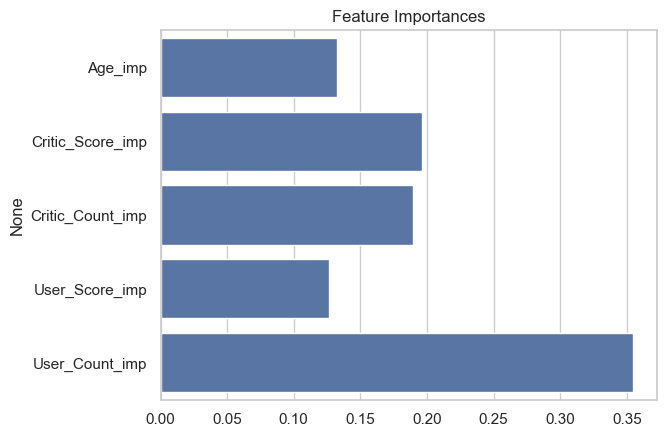

In [234]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a random seed for reproducibility
np.random.seed(555)

# Data Scaling - standardizing features (scaling)
scaler = StandardScaler()

# Scaling the features (excluding the target 'Global_Sales')
X_train_scaled = scaler.fit_transform(train_dataset2.drop(columns='Global_Sales'))
X_test_scaled = scaler.transform(test_dataset2.drop(columns='Global_Sales'))

# Train a random forest model with mtry = 3 (max_features = 3)
rf2 = RandomForestRegressor(n_estimators=500, max_features=3, random_state=555)
rf2.fit(X_train_scaled, train_dataset2['Global_Sales'])

# Predict on the training set
p12 = rf2.predict(X_train_scaled)

# RMSE on training set
rmse_train = np.sqrt(mean_squared_error(train_dataset2['Global_Sales'], p12))
print(f"RMSE on training set: {rmse_train}")

# MAE on training set
mae_train = mean_absolute_error(train_dataset2['Global_Sales'], p12)
print(f"MAE on training set: {mae_train}")

# Predict on the test set
p22 = rf2.predict(X_test_scaled)

# RMSE on test set
rmse_test = np.sqrt(mean_squared_error(test_dataset2['Global_Sales'], p22))
print(f"RMSE on test set: {rmse_test}")

# MAE on test set
mae_test = mean_absolute_error(test_dataset2['Global_Sales'], p22)
print(f"MAE on test set: {mae_test}")

# Feature importances
print("Feature importances:")
print(rf2.feature_importances_)

# Plotting feature importances
sns.barplot(x=rf2.feature_importances_, y=train_dataset2.drop(columns='Global_Sales').columns)
plt.title("Feature Importances")
plt.show()


RMSE on training set: 0.12488660785375691
MAE on training set: 0.0932485216234199
RMSE on test set: 0.3534822580617628
MAE on test set: 0.2659434339561554
Feature importances:
[0.15388073 0.19938584 0.22915523 0.17097892 0.24659927]


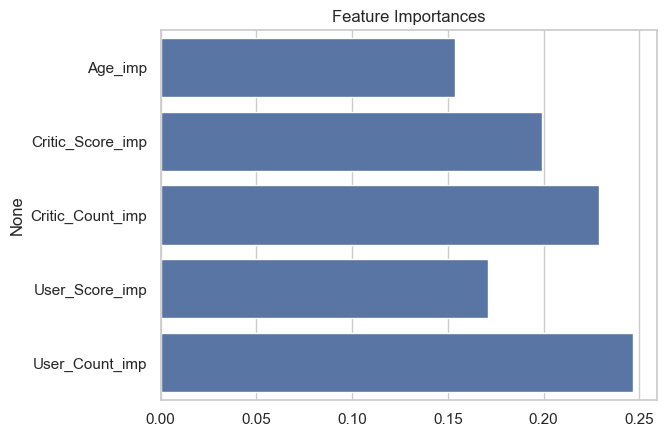

In [235]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(555)

# Removing outliers using Z-score method
z_scores = np.abs(stats.zscore(train_dataset3.drop(columns='Global_Sales')))
train_dataset3_no_outliers = train_dataset3[(z_scores < 3).all(axis=1)]

# Scaling the features (excluding the target 'Global_Sales')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_dataset3_no_outliers.drop(columns='Global_Sales'))
X_test_scaled = scaler.transform(test_dataset3.drop(columns='Global_Sales'))

# Train a random forest model with ntree=600 and mtry=3 (max_features=3)
rf3 = RandomForestRegressor(n_estimators=600, max_features=3, random_state=555)
rf3.fit(X_train_scaled, train_dataset3_no_outliers['Global_Sales'])

# Predict on the training set
p13 = rf3.predict(X_train_scaled)

# RMSE on training set
rmse_train = np.sqrt(mean_squared_error(train_dataset3_no_outliers['Global_Sales'], p13))
print(f"RMSE on training set: {rmse_train}")

# MAE on training set
mae_train = mean_absolute_error(train_dataset3_no_outliers['Global_Sales'], p13)
print(f"MAE on training set: {mae_train}")

# Predict on the test set
p23 = rf3.predict(X_test_scaled)

# RMSE on test set
rmse_test = np.sqrt(mean_squared_error(test_dataset3['Global_Sales'], p23))
print(f"RMSE on test set: {rmse_test}")

# MAE on test set
mae_test = mean_absolute_error(test_dataset3['Global_Sales'], p23)
print(f"MAE on test set: {mae_test}")

# Feature importances
print("Feature importances:")
print(rf3.feature_importances_)

# Plotting feature importances
sns.barplot(x=rf3.feature_importances_, y=train_dataset3.drop(columns='Global_Sales').columns)
plt.title("Feature Importances")
plt.show()


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


RMSE on training set: 0.1253933117873944
RMSE on test set: 0.3599805323487532
MAE on training set: 0.09362267978110264
MAE on test set: 0.2710114370063646
Feature importances:
[0.15085243 0.19186353 0.23709794 0.16893614 0.25124997]


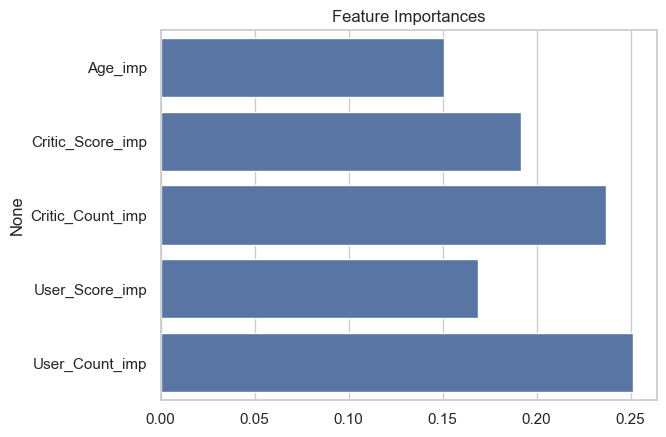

In [236]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(555)

# Removing outliers using Z-score method
z_scores = np.abs(stats.zscore(train_dataset4.drop(columns='Global_Sales')))
train_dataset4_no_outliers = train_dataset4[(z_scores < 3).all(axis=1)]

# Scaling the features (excluding the target 'Global_Sales')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_dataset4_no_outliers.drop(columns='Global_Sales'))
X_test_scaled = scaler.transform(test_dataset4.drop(columns='Global_Sales'))

# Train a random forest model with ntree=700 and mtry=4 (max_features=4)
rf4 = RandomForestRegressor(n_estimators=700, max_features=4, random_state=555)
rf4.fit(X_train_scaled, train_dataset4_no_outliers['Global_Sales'])

# Predict on the training set
p14 = rf4.predict(X_train_scaled)

# Confusion matrix for training set (using rounded predictions for classification)
p14_rounded = np.round(p14)
cm_train4 = pd.crosstab(p14_rounded, train_dataset4_no_outliers['Global_Sales'])
# print("Confusion matrix for training set:")
# print(cm_train4)

# Train accuracy
train_accuracy4 = np.sum(np.diag(cm_train4)) / np.sum(cm_train4)
# print(f"Train accuracy: {train_accuracy4}")

# Predict on the test set
p24 = rf4.predict(X_test_scaled)

# Confusion matrix for test set (rounded predictions for classification)
p24_rounded = np.round(p24)
cm_test4 = pd.crosstab(p24_rounded, test_dataset4['Global_Sales'])
# print("Confusion matrix for test set:")
# print(cm_test4)

# Test accuracy
test_accuracy4 = np.sum(np.diag(cm_test4)) / np.sum(cm_test4)
# print(f"Test accuracy: {test_accuracy4}")

# RMSE on training set
rmse_train = np.sqrt(mean_squared_error(train_dataset4_no_outliers['Global_Sales'], p14))
print(f"RMSE on training set: {rmse_train}")

# RMSE on test set
rmse_test = np.sqrt(mean_squared_error(test_dataset4['Global_Sales'], p24))
print(f"RMSE on test set: {rmse_test}")

# MAE on training set
mae_train = mean_absolute_error(train_dataset4_no_outliers['Global_Sales'], p14)
print(f"MAE on training set: {mae_train}")

# MAE on test set
mae_test = mean_absolute_error(test_dataset4['Global_Sales'], p24)
print(f"MAE on test set: {mae_test}")

# Feature importances
print("Feature importances:")
print(rf4.feature_importances_)

# Plotting feature importances
sns.barplot(x=rf4.feature_importances_, y=train_dataset4.drop(columns='Global_Sales').columns)
plt.title("Feature Importances")
plt.show()


                                              SUMMARY OF RANDOM FOREST REGRESSION
                                      
| No.  | Experiment      |  RMSE (Training)  |  RMSE (Test)  |  MAE  (Training)  |  MAE (Test)  |
|-----|-----------------|-----------------|-------------|----------------|------------|
| 1   | Experiment 5   | 0.699802            | 1.517891         | 0.229063            | 0.613062        |
| 2   | Experiment 6   | 0.700405           | 1.550474         | 0.232120            | 0.631295        |
| 3   | Experiment 7   | 0.124886            | 0.353482         | 0.093248            | 0.265943        |
| 4   | Experiment 8   | 0.125393            | 0.359980         | 0.093622            | 0.271011        |




# SVM REGRESSION

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Separate the features and target variable for both train and test sets
X_train1 = train_dataset1.drop(columns=['Global_Sales'])  # Features for training
y_train1 = train_dataset1['Global_Sales']  # Target variable for training

X_test1 = test_dataset1.drop(columns=['Global_Sales'])  # Features for testing
y_test1 = test_dataset1['Global_Sales']  # Target variable for testing

# Train SVM model with RBF kernel
svm_rbf1 = SVR(kernel='rbf')
svm_rbf1.fit(X_train1, y_train1)

# Predict on the training set
pred11 = svm_rbf1.predict(X_train1)

# Predict on the test set
pred12 = svm_rbf1.predict(X_test1)

# Calculate RMSE and MAE for training set
rmse_train = mean_squared_error(y_train1, pred11, squared=False)
mae_train = mean_absolute_error(y_train1, pred11)

# Calculate RMSE and MAE for test set
rmse_test = mean_squared_error(y_test1, pred12, squared=False)
mae_test = mean_absolute_error(y_test1, pred12)

# Print the evaluation metrics
print(f"RMSE on Training Set: {rmse_train}")
print(f"MAE on Training Set: {mae_train}")
print(f"RMSE on Test Set: {rmse_test}")
print(f"MAE on Test Set: {mae_test}")


RMSE on Training Set: 1.9684478723754413
MAE on Training Set: 0.5725734956181637
RMSE on Test Set: 1.6972078088888933
MAE on Test Set: 0.5998324317741706


In [238]:
# Print model parameters
print(f"SVM-Type: {svm_rbf1.kernel}")  # SVM Kernel type
print(f"SVM-Kernel: {svm_rbf1.kernel}")  # Kernel type (Radial, in this case)
print(f"Cost (C): {svm_rbf1.C}")  # Cost (Regularization parameter)
print(f"Gamma: {svm_rbf1.gamma}")  # Gamma (used in RBF kernel)
print(f"Epsilon: {svm_rbf1.epsilon}")  # Epsilon (used in epsilon-SVR)

# Print the number of support vectors
print(f"Number of Support Vectors: {len(svm_rbf1.support_)}")


SVM-Type: rbf
SVM-Kernel: rbf
Cost (C): 1.0
Gamma: scale
Epsilon: 0.1
Number of Support Vectors: 3627


In [239]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Separate the features and target variable for both train and test sets
X_train2 = train_dataset2.drop(columns=['Global_Sales'])  # Features for training
y_train2 = train_dataset2['Global_Sales']  # Target variable for training

X_test2 = test_dataset2.drop(columns=['Global_Sales'])  # Features for testing
y_test2 = test_dataset2['Global_Sales']  # Target variable for testing

# Train SVM model with RBF kernel
svm_rbf2 = SVR(kernel='rbf')
svm_rbf2.fit(X_train2, y_train2)

# Predict on the training set
pred21 = svm_rbf2.predict(X_train2)

# Predict on the test set
pred22 = svm_rbf2.predict(X_test2)

# Calculate RMSE and MAE for training set
rmse_train = mean_squared_error(y_train2, pred21, squared=False)
mae_train = mean_absolute_error(y_train2, pred21)

# Calculate RMSE and MAE for test set
rmse_test = mean_squared_error(y_test2, pred22, squared=False)
mae_test = mean_absolute_error(y_test2, pred22)

# Print the evaluation metrics
print(f"RMSE on Training Set: {rmse_train}")
print(f"MAE on Training Set: {mae_train}")
print(f"RMSE on Test Set: {rmse_test}")
print(f"MAE on Test Set: {mae_test}")


RMSE on Training Set: 1.9624135032493892
MAE on Training Set: 0.5682128938095219
RMSE on Test Set: 1.6606675050314637
MAE on Test Set: 0.5809979182836187


In [240]:
# Print model parameters
print(f"SVM-Type: {svm_rbf2.kernel}")  # SVM Kernel type
print(f"SVM-Kernel: {svm_rbf2.kernel}")  # Kernel type (Radial, in this case)
print(f"Cost (C): {svm_rbf2.C}")  # Cost (Regularization parameter)
print(f"Gamma: {svm_rbf2.gamma}")  # Gamma (used in RBF kernel)
print(f"Epsilon: {svm_rbf2.epsilon}")  # Epsilon (used in epsilon-SVR)

# Print the number of support vectors
print(f"Number of Support Vectors: {len(svm_rbf2.support_)}")


SVM-Type: rbf
SVM-Kernel: rbf
Cost (C): 1.0
Gamma: scale
Epsilon: 0.1
Number of Support Vectors: 3599


In [241]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Separate the features and target variable for both train and test sets
X_train3 = train_dataset3.drop(columns=['Global_Sales'])  # Features for training
y_train3 = train_dataset3['Global_Sales']  # Target variable for training

X_test3 = test_dataset3.drop(columns=['Global_Sales'])  # Features for testing
y_test3 = test_dataset3['Global_Sales']  # Target variable for testing

# Train SVM model with RBF kernel
svm_rbf3 = SVR(kernel='rbf')
svm_rbf3.fit(X_train3, y_train3)

# Predict on the training set
pred31 = svm_rbf3.predict(X_train3)

# Predict on the test set
pred32 = svm_rbf3.predict(X_test3)

# Calculate RMSE and MAE for training set
rmse_train = mean_squared_error(y_train3, pred31, squared=False)
mae_train = mean_absolute_error(y_train3, pred31)

# Calculate RMSE and MAE for test set
rmse_test = mean_squared_error(y_test3, pred32, squared=False)
mae_test = mean_absolute_error(y_test3, pred32)

# Print the evaluation metrics
print(f"RMSE on Training Set: {rmse_train}")
print(f"MAE on Training Set: {mae_train}")
print(f"RMSE on Test Set: {rmse_test}")
print(f"MAE on Test Set: {mae_test}")


RMSE on Training Set: 0.3610925535938696
MAE on Training Set: 0.2481029204655532
RMSE on Test Set: 0.37746528851347366
MAE on Test Set: 0.25940317591875944


In [242]:
# Print model parameters
print(f"SVM-Type: {svm_rbf3.kernel}")  # SVM Kernel type
print(f"SVM-Kernel: {svm_rbf3.kernel}")  # Kernel type (Radial, in this case)
print(f"Cost (C): {svm_rbf3.C}")  # Cost (Regularization parameter)
print(f"Gamma: {svm_rbf3.gamma}")  # Gamma (used in RBF kernel)
print(f"Epsilon: {svm_rbf3.epsilon}")  # Epsilon (used in epsilon-SVR)

# Print the number of support vectors
print(f"Number of Support Vectors: {len(svm_rbf3.support_)}")


SVM-Type: rbf
SVM-Kernel: rbf
Cost (C): 1.0
Gamma: scale
Epsilon: 0.1
Number of Support Vectors: 3028


In [243]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Separate the features and target variable for both train and test sets
X_train4 = train_dataset4.drop(columns=['Global_Sales'])  # Features for training
y_train4 = train_dataset4['Global_Sales']  # Target variable for training

X_test4 = test_dataset4.drop(columns=['Global_Sales'])  # Features for testing
y_test4 = test_dataset4['Global_Sales']  # Target variable for testing

# Train SVM model with RBF kernel
svm_rbf4 = SVR(kernel='rbf')
svm_rbf4.fit(X_train4, y_train4)

# Predict on the training set
pred41 = svm_rbf4.predict(X_train4)

# Predict on the test set
pred42 = svm_rbf4.predict(X_test4)

# Calculate RMSE and MAE for training set
rmse_train = mean_squared_error(y_train4, pred41, squared=False)
mae_train = mean_absolute_error(y_train4, pred41)

# Calculate RMSE and MAE for test set
rmse_test = mean_squared_error(y_test4, pred42, squared=False)
mae_test = mean_absolute_error(y_test4, pred42)

# Print the evaluation metrics
print(f"RMSE on Training Set: {rmse_train}")
print(f"MAE on Training Set: {mae_train}")
print(f"RMSE on Test Set: {rmse_test}")
print(f"MAE on Test Set: {mae_test}")


RMSE on Training Set: 0.3615860339903322
MAE on Training Set: 0.24717236962530817
RMSE on Test Set: 0.38681707339742794
MAE on Test Set: 0.26627638036518025


In [244]:
# Print model parameters
print(f"SVM-Type: {svm_rbf4.kernel}")  # SVM Kernel type
print(f"SVM-Kernel: {svm_rbf4.kernel}")  # Kernel type (Radial, in this case)
print(f"Cost (C): {svm_rbf4.C}")  # Cost (Regularization parameter)
print(f"Gamma: {svm_rbf4.gamma}")  # Gamma (used in RBF kernel)
print(f"Epsilon: {svm_rbf4.epsilon}")  # Epsilon (used in epsilon-SVR)

# Print the number of support vectors
print(f"Number of Support Vectors: {len(svm_rbf4.support_)}")


SVM-Type: rbf
SVM-Kernel: rbf
Cost (C): 1.0
Gamma: scale
Epsilon: 0.1
Number of Support Vectors: 3434


                                                     SUMMARY OF SVM REGRESSION
                                      
| No.  | Experiment      |  RMSE (Training)  |  RMSE (Test)  |  MAE  (Training)  |  MAE (Test)  |
|-----|-----------------|-----------------|-------------|----------------|------------|
| 1   | Experiment 9   | 1.968447            | 1.697207         | 0.572573            | 0.599832        |
| 2   | Experiment 10   | 1.962413           | 1.660667         | 0.568212            | 0.580997        |
| 3   | Experiment 11   | 0.361092            | 0.377465         | 0.248102            | 0.259403        |
| 4   | Experiment 12  | 0.361586            | 0.386817         | 0.247172            | 0.266276        |


# MODEL COMPARISON


<table>
<thead>
  <tr>
    <th rowspan="2">Dataset</th>
    <th rowspan="2">Model</th>
    <th rowspan="2">Experiment</th>
    <th colspan="2">RMSE</th>
    <th colspan="2">MAE</th>
  </tr>
  <tr>
    <th>Train</th>
    <th>Test</th>
    <th>Train</th>
    <th>Test</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td rowspan="3">Dataset_1</td>
    <td>Multiple Linear Regression</td>
    <td>Experiment 1</td>
    <td>1.913704</td>
    <td>1.587322</td>
    <td>0.705733</td>
    <td>0.696343</td>
  </tr>
  <tr>
    <td>Random Forest Regression</td>
    <td>Experiment 5</td>
    <td>0.699802</td>
    <td>1.517891</td>
    <td>0.229063</td>
    <td>0.613062</td>
  </tr>
  <tr>
    <td>Support Vector Machine (RBF kernel)</td>
    <td>Experiment 9</td>
    <td>1.968447</td>
    <td>1.697207</td>
    <td>0.572573</td>
    <td>0.599832</td>
  </tr>
    
  <tr>
    <td rowspan="3">Dataset_2</td>
    <td>Multiple Linear Regression</td>
    <td>Experiment 2</td>
    <td>1.913704</td>
    <td>1.587322</td>
    <td>0.705733</td>
    <td>0.696343</td>
  </tr>

  <tr>
    <td>Random Forest Regression</td>
    <td>Experiment 6</td>
    <td>0.700405</td>
    <td>1.550474</td>
    <td>0.232120</td>
    <td>0.631295</td>
  </tr>
  <tr>
    <td>Support Vector Machine (RBF kernel)</td>
    <td>Experiment 10</td>
    <td>1.962413</td>
    <td>1.660667</td>
    <td>0.568212</td>
    <td>0.580997</td>
  </tr>
    
  <tr>
    <td rowspan="3">Dataset_3</td>
      <td>Multiple Linear Regression</td>
    <td>Experiment 3</td>
    <td>0.354862</td>
    <td>0.368785</td>
    <td>0.269032</td>
    <td>0.281894</td>
  </tr>
  <tr>
    <td>Random Forest Regression</td>
    <td>Experiment 7</td>
    <td>0.124886</td>
    <td>0.353482</td>
    <td>0.093248</td>
    <td>0.265943</td>
  </tr>
  <tr>
    <td>Support Vector Machine (RBF kernel)</td>
    <td>Experiment 11</td>
    <td>0.361092</td>
    <td>0.377465</td>
    <td>0.248102</td>
    <td>0.259403</td>
  </tr>
    
  <tr>
    <td rowspan="3">Dataset_4</td>
    <td>Multiple Linear Regression</td>
    <td>Experiment 4</td>
    <td>0.355282</td>
    <td>0.373641</td>
    <td>0.269209</td>
    <td>0.285376</td>
  </tr>

  <tr>
    <td>Random Forest Regression</td>
    <td>Experiment 8</td>
    <td>0.125393</td>
    <td>0.359980</td>
    <td>0.093622</td>
    <td>0.271011</td>
  </tr>
  <tr>
    <td>Support Vector Machine (RBF kernel)</td>
    <td>Experiment 12</td>
    <td>0.361586</td>
    <td>0.386817</td>
    <td>0.247172</td>
    <td>0.266276</td>
  </tr>
</tbody>
</table>
